<a href="https://colab.research.google.com/github/Harshal12355/Boston-House-Price-Prediction/blob/main/Boston_House_Pricing_Prediction_with_GCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-cloud-bigquery
!pip install matplotlib
!pip install numpy

In [2]:
!pip install scikit-learn

In [3]:
!pip uninstall -y pandas
!pip install google-cloud-bigquery
!pip install pandas

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [4]:
from google.colab import auth
auth.authenticate_user()

In [10]:
from google.cloud import bigquery
import pandas as pd


# Set your project ID
project_id = 'round-bounty-429122-g7'  # replace with your project ID

# Initialize BigQuery client with the project ID
client = bigquery.Client(project=project_id)

query = """
SELECT * FROM `round-bounty-429122-g7.Boston_House_Pricing.HousePrices` LIMIT 1000
"""
df = client.query(query).to_dataframe()


In [11]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265.0,15.6,393.37,5.03,31.1
2,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,265.0,15.6,376.70,4.38,29.1
3,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315.0,16.4,392.89,6.57,21.9
4,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666.0,20.2,392.92,10.42,21.8
502,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666.0,20.2,370.73,13.34,20.6
503,3.67367,0.0,18.10,0,0.583,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58,21.2
504,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666.0,20.2,392.68,14.98,19.1


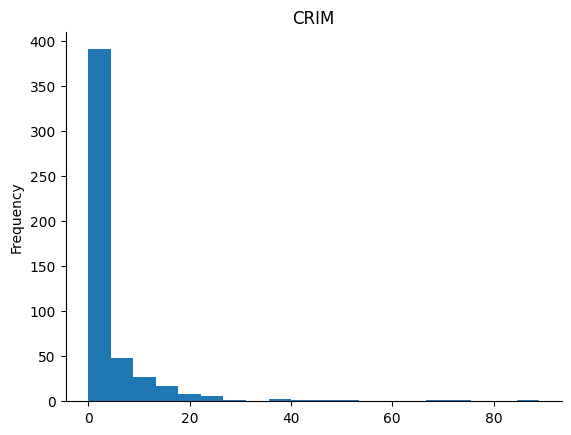

In [14]:
# @title CRIM

from matplotlib import pyplot as plt
df['CRIM'].plot(kind='hist', bins=20, title='CRIM')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = df.drop('MEDV', axis=1)  # replace with your features
y = df['MEDV']  # replace with your target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 22.383899250824804
